# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import re
import csv

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif',size ='16')
pd.options.display.max_rows = 4000
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['text.usetex'] = True

# Functions

In [13]:
#mainFolder: main folder containing experiment folders
#folder: the folder header
#rep: number of repetitions
def minGenerationCount(mainFolder,folder,rep):
    minimum = 100000
    genCount= []
    for i in range(0,rep):
        csv_file = open('./'+mainFolder+'/'+folder+'xL/'+str(i+1)+'/log/evolution.txt')
        csv_reader = csv.reader(csv_file,delimiter='-')
        line_count = 0
        for row in csv_reader:
            line_count = line_count + 1
        genCount.append(line_count)
        #print(line_count)
    for count in genCount:
        if (count<=minimum):
            minimum = count
    return minimum

#mainFolder: main folder containing experiment folders
#folder: array of folder headers
#tp: the type of graph 'evol','nModules','brokenConn'
#rep: number of repetitions
#indiv: boolean plot individual graphs or all in the same
def plotResultGraphs(mainFolder,folders,tp,rep,indiv):
    logCol = 1
    file ='evolution'
    if(tp=='evol'):
        logCol = 1
        file = 'evolution'
    elif (tp=='nModules'):
        logCol = 2
        file = 'bestFeatures'
    elif (tp=='brokenConn'):
        logCol = 8
        file = 'meanFeatures'
    
    if(not indiv):
        fig = plt.figure(figsize=(15,10))
        ax1 = fig.gca()
        
    for k in range(0,len(folders)):
        if(indiv):
            fig = plt.figure()
            ax1 = fig.gca()
        nGenerations = minGenerationCount(mainFolder,folders[k],rep)
        df = pd.DataFrame(columns=range(0,nGenerations))
        evolBest = []
        
        for i in range(0,rep):
            evolBest.clear()
            csv_file = open('./'+mainFolder+'/'+folders[k]+'xL/'+str(i+1)+'/log/'+file+'.txt')
            #csv_file = open('./filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/bestFeatures.txt')
            #csv_file = open('/content/drive/My Drive/2019/Papers/Base Length/filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/evolution.txt')
            csv_reader = csv.reader(csv_file,delimiter='-')
            line_count = 0
            for row in csv_reader:
                evolBest.append(float(row[logCol]))
                #evolBest.append(float(row[2]))
                line_count =line_count + 1
                #print(line_count)
                #print(evolBest)
                if line_count >= nGenerations:
                    break
            df.loc[i] = evolBest[:]

        #ax1.plot(df.min(),label='Best')
        #ax1.plot(df.max(),label='Worst')
        x = range(nGenerations)
        q3 = df.quantile(0.75)
        q1 = df.quantile(0.25)

        ax1.plot(x,df.median(),label='Median'+folders[k])
        if(indiv):
            ax1.plot(x,q3, color='k', linestyle='--',label='IQR')
        else:
            ax1.plot(x,q3, color='k', linestyle='--',label='_nolegend_')
        ax1.plot(x,q1, color='k', linestyle='--',label='_nolegend_')
        ax1.fill_between(x, q1, q3, alpha=0.5)
        
        #plt.axhline(y=0.3, color='k', linestyle='-.')
        if(tp=='evol'):
            ax1.set_ylim(-0.1,6)
        elif(tp=='nModules'):
            ax1.set_ylim(-0.1,20)
        elif(tp=='brokenConn'):
            ax1.set_ylim(-0.1,4)
        ax1.legend()
        ax1.set_title('Length x'+folders[k])
        #ax1.set_xticks([0,100,200,300])
        #ax1.set_xticklabels(['0','3000','6000','9000'])
        ax1.set_xlabel('Generations')
        ax1.set_ylabel('Fitness')
        #plt.savefig('CPGGenDEOne.eps',bbox_inches="tight")
    plt.show()
    

# All Evolution Individual graphs

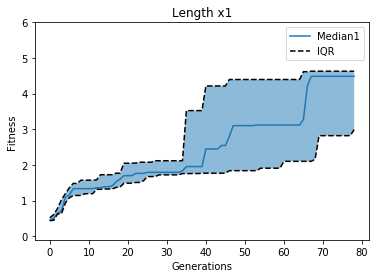

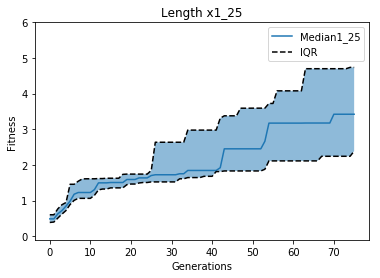

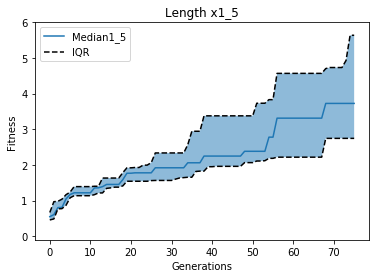

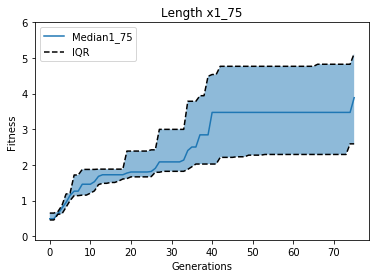

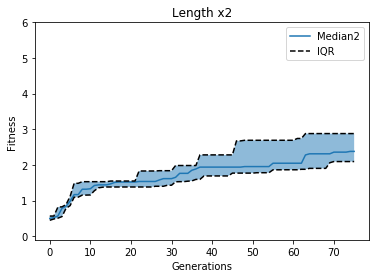

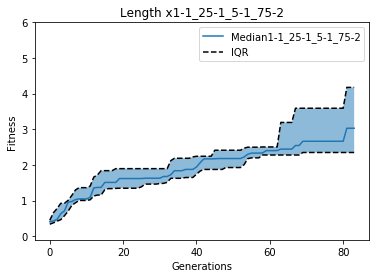

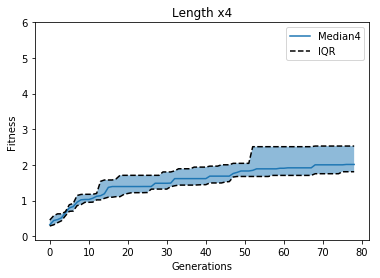

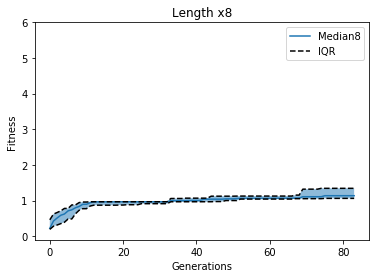

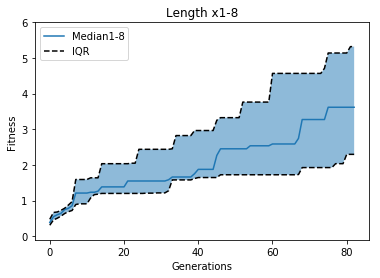

In [6]:
folders = ['1','1_25','1_5','1_75','2','1-1_25-1_5-1_75-2','4','8','1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'evol',10,True)

# Compare evolutions (Put folders to compare in folders array)

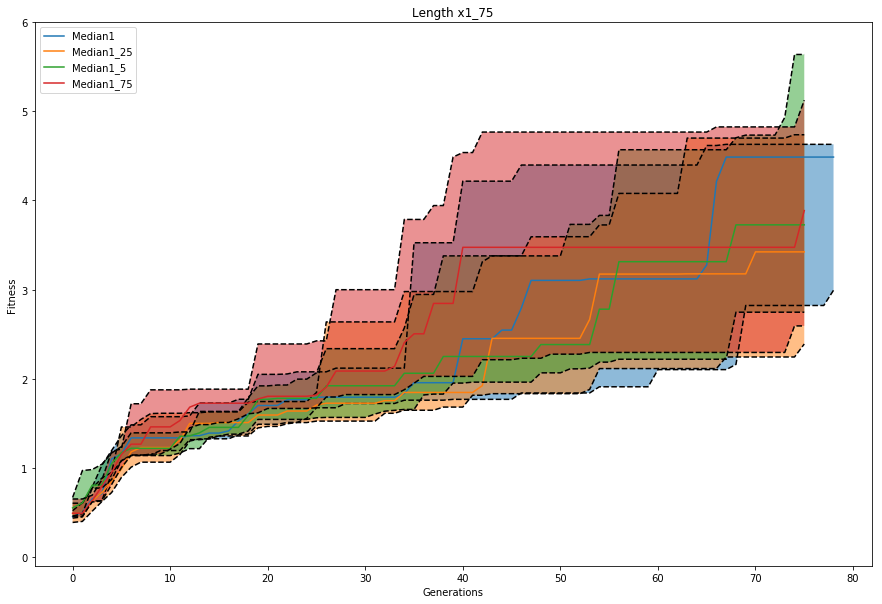

In [8]:
folders = ['1','1_25','1_5','1_75']   #,'2','1-1_25-1_5-1_75-2'
plotResultGraphs('filesFromLenghtExperiment',folders,'evol',10,False)

# All Number of Modules Individual graphs

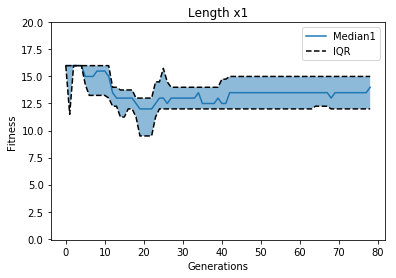

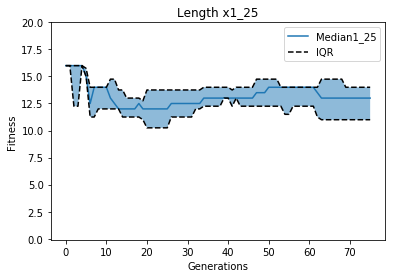

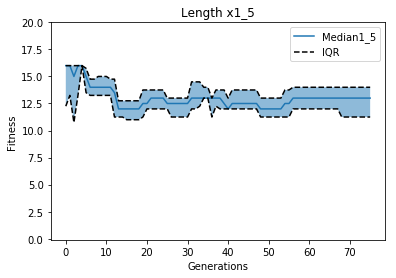

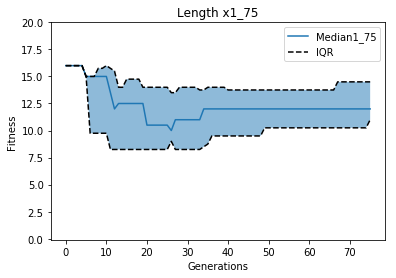

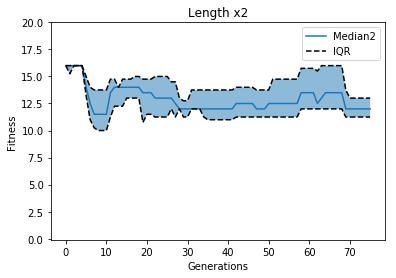

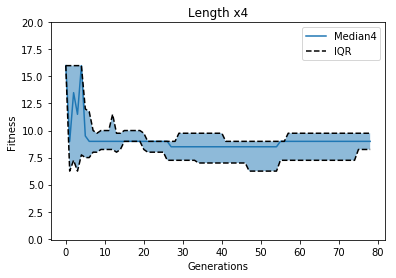

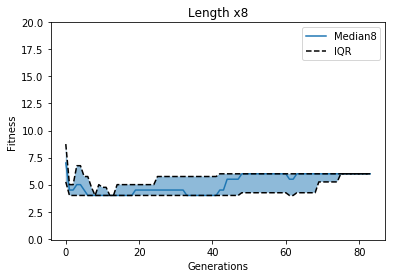

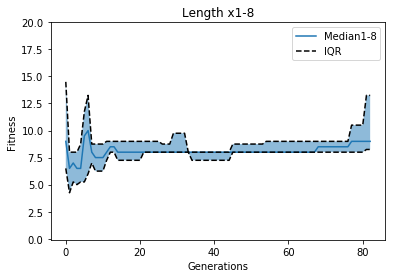

In [9]:
folders = ['1','1_25','1_5','1_75','2','4','8','1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'nModules',10,True)

# Compare nModules (Put folders to compare in folders array)

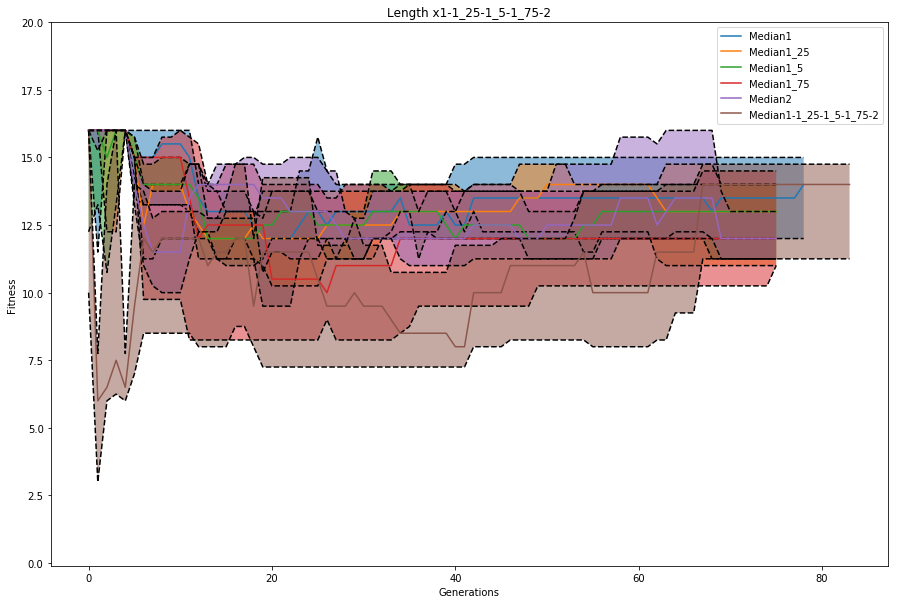

In [10]:
folders = ['1','1_25','1_5','1_75','2','1-1_25-1_5-1_75-2']   
plotResultGraphs('filesFromLenghtExperiment',folders,'nModules',10,False)

# All broken connections Individual graphs

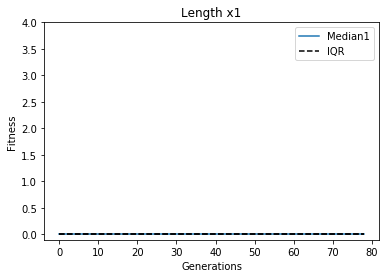

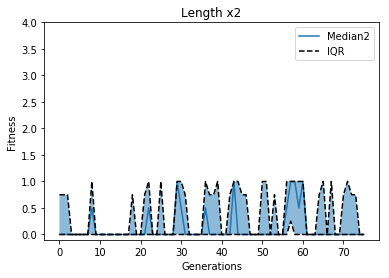

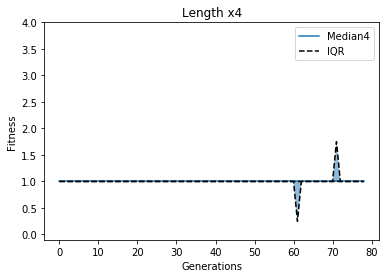

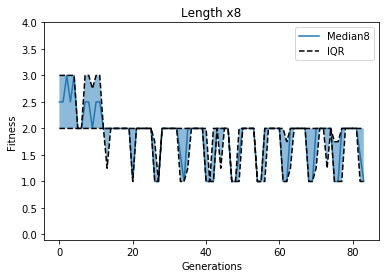

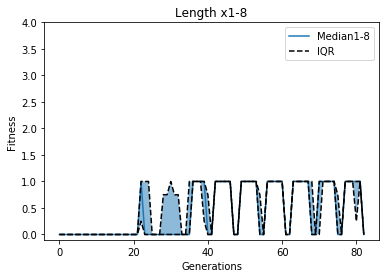

In [16]:
folders = ['1','2','4','8','1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'brokenConn',10,True)

# Compare broken connections (Put folders to compare in folders array)

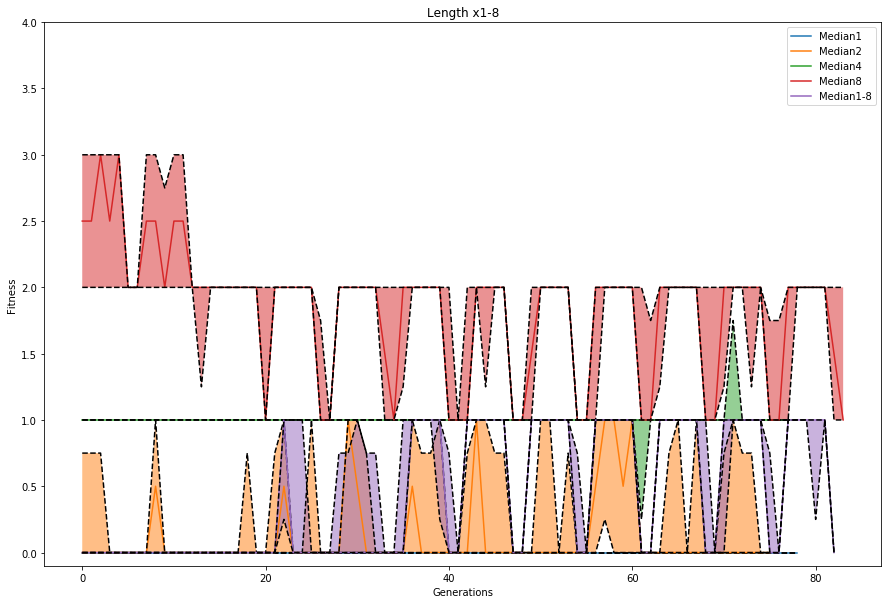

In [17]:
folders = ['1','2','4','8','1-8']   
plotResultGraphs('filesFromLenghtExperiment',folders,'brokenConn',10,False)

# 4ModuleInit Evolution Compare

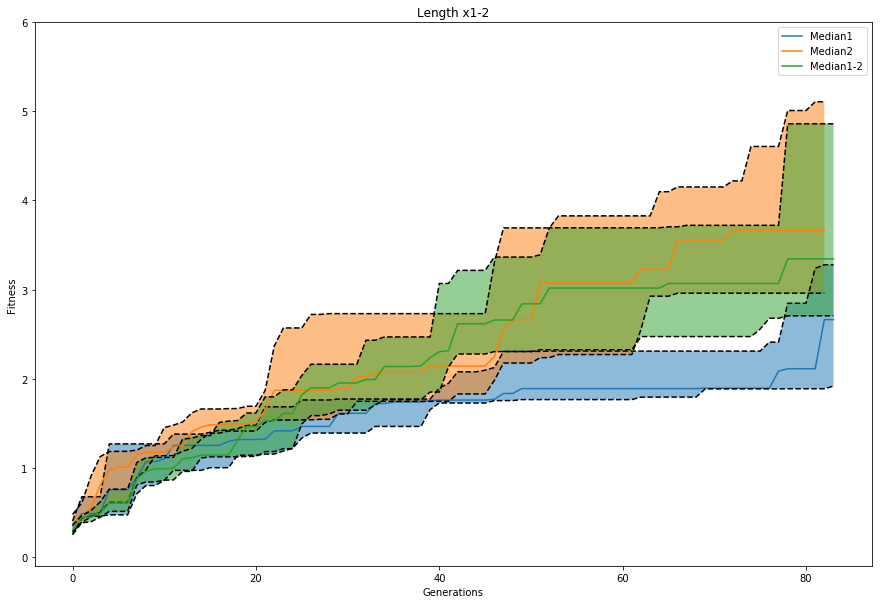

In [103]:
folders = ['1','2','1-2']  
plotResultGraphs('4ModuleInit',folders,'evol',10,False)

# FlatBase Evolution Individual Graphs

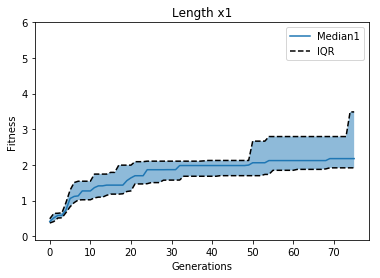

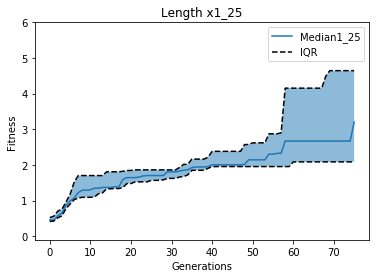

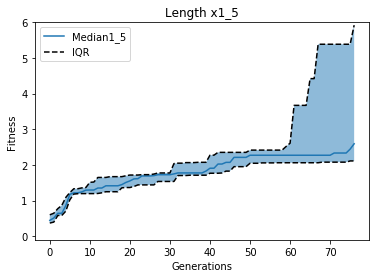

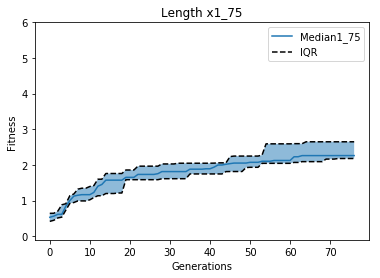

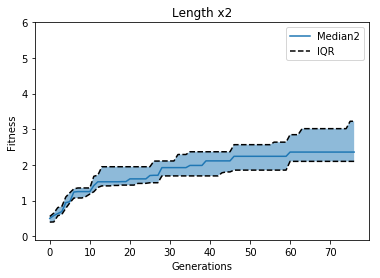

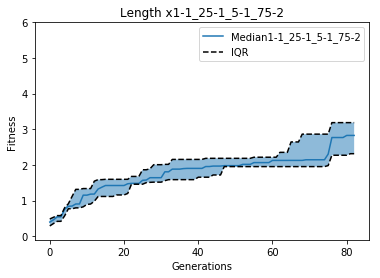

In [3]:
folders = ['1','1_25','1_5','1_75','2','1-1_25-1_5-1_75-2']     
plotResultGraphs('flatBase',folders,'evol',10,True)

# FlatBase Evolution Compare

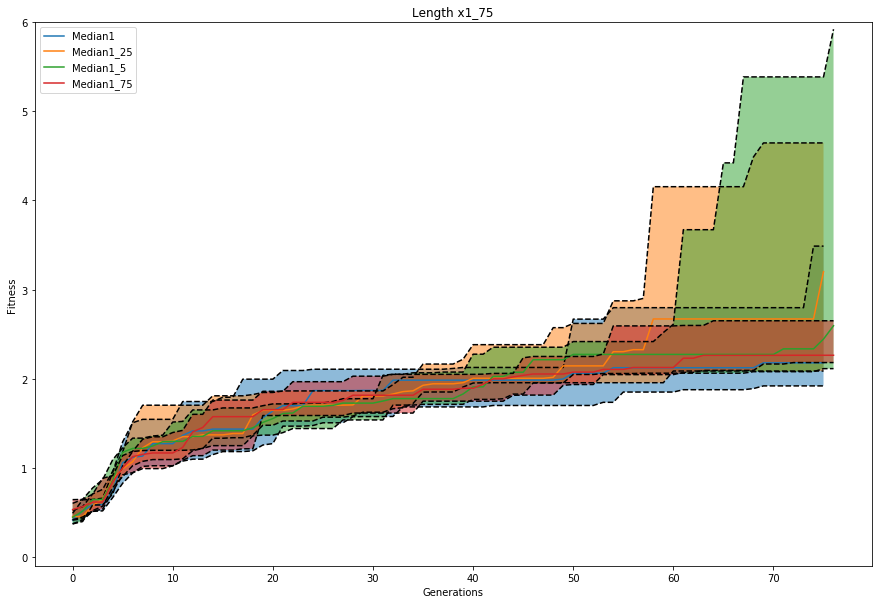

In [5]:
folders = ['1','1_25','1_5','1_75']     
plotResultGraphs('flatBase',folders,'evol',10,False)